In [7]:
import pandas as pd

# Even though my whole talk was a pun on this package,
# I'd almost had forgotten to include it, lol
import seaborn as sns

In [8]:
runs = pd.read_csv("results/runs.csv")
runs = runs[runs["Dataset"] == "Enzymes"]
runs = runs[runs["Loss (train)"].notna()]

# 🤔 No re-mapping of names needed, you can select display-ready data here
runs[["Iteration", "seed", "Model", "Dataset", "Loss (train)", "Accuracy (train)"]]

,Iteration,seed,Model,Dataset,Loss (train),Accuracy (train)
49200,0.0,44,Graph Attention,Enzymes,1.859166,0.09375
49201,1.0,44,Graph Attention,Enzymes,2.030178,0.15625
49202,2.0,44,Graph Attention,Enzymes,1.737011,0.25000
49203,3.0,44,Graph Attention,Enzymes,1.779069,0.18750
49204,4.0,44,Graph Attention,Enzymes,1.796782,0.25000
...,...,...,...,...,...,...
74195,3995.0,91,Graph Convolution,Enzymes,0.408410,0.84375
74196,3996.0,91,Graph Convolution,Enzymes,0.625181,0.68750
74197,3997.0,91,Graph Convolution,Enzymes,0.230251,0.93750
74198,3998.0,91,Graph Convolution,Enzymes,0.215219,0.93750


<AxesSubplot: xlabel='Iteration', ylabel='Loss (train)'>

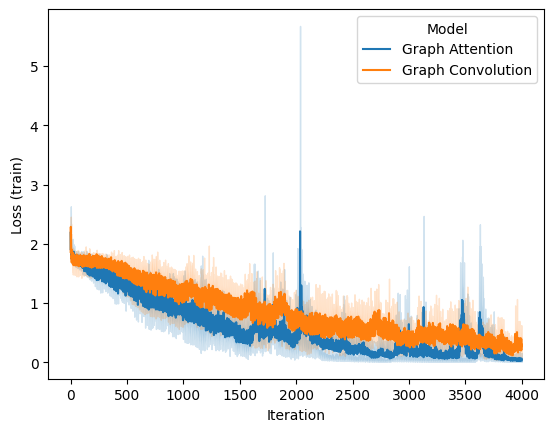

In [9]:
# 🤔 One-liner
sns.lineplot(data=runs, x="Iteration", y="Loss (train)", hue="Model")

In [10]:
def aggregate(data):
    return data.mean(), data.std()


def highlight_best(row):
    def _per_row(x):
        mean, std = x
        y = f"{mean * 100:.2f} \u00B1 {std * 100:.2f}"
        return f"\\textbf{{{y}}}" if x == row.max() else y

    return row.apply(_per_row)

# 🤔 The general idea is:
# Dimensions are the axes of your table
# The metric is the one you want to compare
def to_latex(df, dimensions, metric):
    return (
        df[dimensions + [metric]]
        .groupby(dimensions)
        .agg(aggregate)

        # Pandas magic 🤷‍♂️
        .unstack(level=1)
        .apply(highlight_best, axis=0)
        .style.to_latex(buf="results/results.tex")
    )

In [11]:
runs = pd.read_csv("results/runs.csv")
test_runs = runs[runs["Accuracy (test)"].notna()]
to_latex(test_runs, ["Model", "Dataset"], "Accuracy (test)")